### Feature Extraction with Eigen Face
![diagrama](attachment:image.png)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Eigen face
from sklearn.decomposition import PCA
import pickle

In [4]:
# Load the data
data = pickle.load(open('./data/data_images_100_100.pickle',mode='rb')) 

In [5]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,female


##### Eigen Face

In [7]:
# Mean Face
x = data.drop('gender',axis=1).values # all images
print(x)

[[0.78431373 0.74117647 0.7372549  ... 0.45882353 0.4627451  0.47843137]
 [0.12156863 0.09803922 0.1372549  ... 0.1372549  0.25490196 0.0745098 ]
 [0.19215686 0.19215686 0.1372549  ... 0.83137255 0.82352941 0.81568627]
 ...
 [0.69411765 0.70196078 0.70588235 ... 0.61960784 0.65098039 0.6745098 ]
 [0.14509804 0.14509804 0.14509804 ... 0.27843137 0.28235294 0.27843137]
 [0.71372549 0.71764706 0.72156863 ... 0.74509804 0.74509804 0.74509804]]


In [8]:
mean_face = x.mean(axis=0) # flatten mean face
print(mean_face.shape)

(10000,)


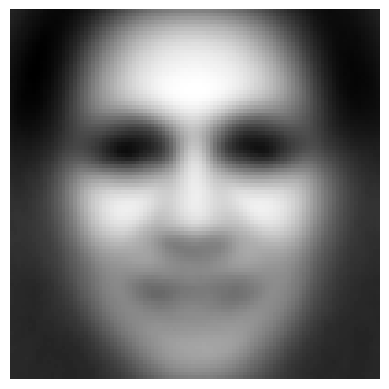

In [10]:
# visualize mean face
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

***Subtract data with mean face***

In [11]:
x_t = x - mean_face # transformed data

**Apply x_t data to PCA**

- Find the right number of component - Elbow
- With right number component computer Principal components

In [12]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(x_t)

PCA(whiten=True)

In [14]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.251699,0.251699,1
1,0.114162,0.365860,2
2,0.105622,0.471482,3
3,0.051887,0.523369,4
4,0.033064,0.556433,5


<AxesSubplot:>

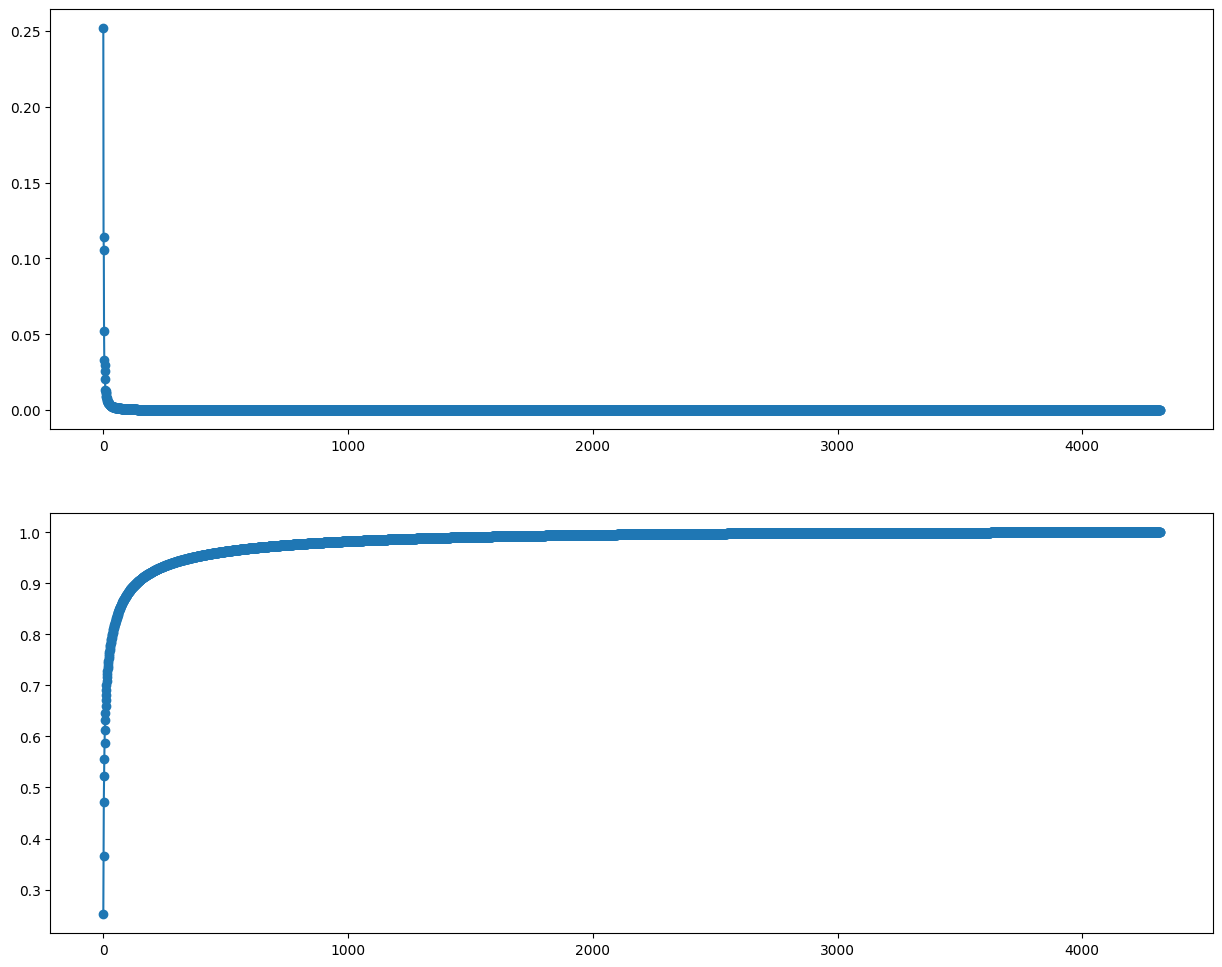

In [15]:
# visualize explained variance
fig, ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].plot(kind='line',marker='o',ax=ax[1])

<AxesSubplot:>

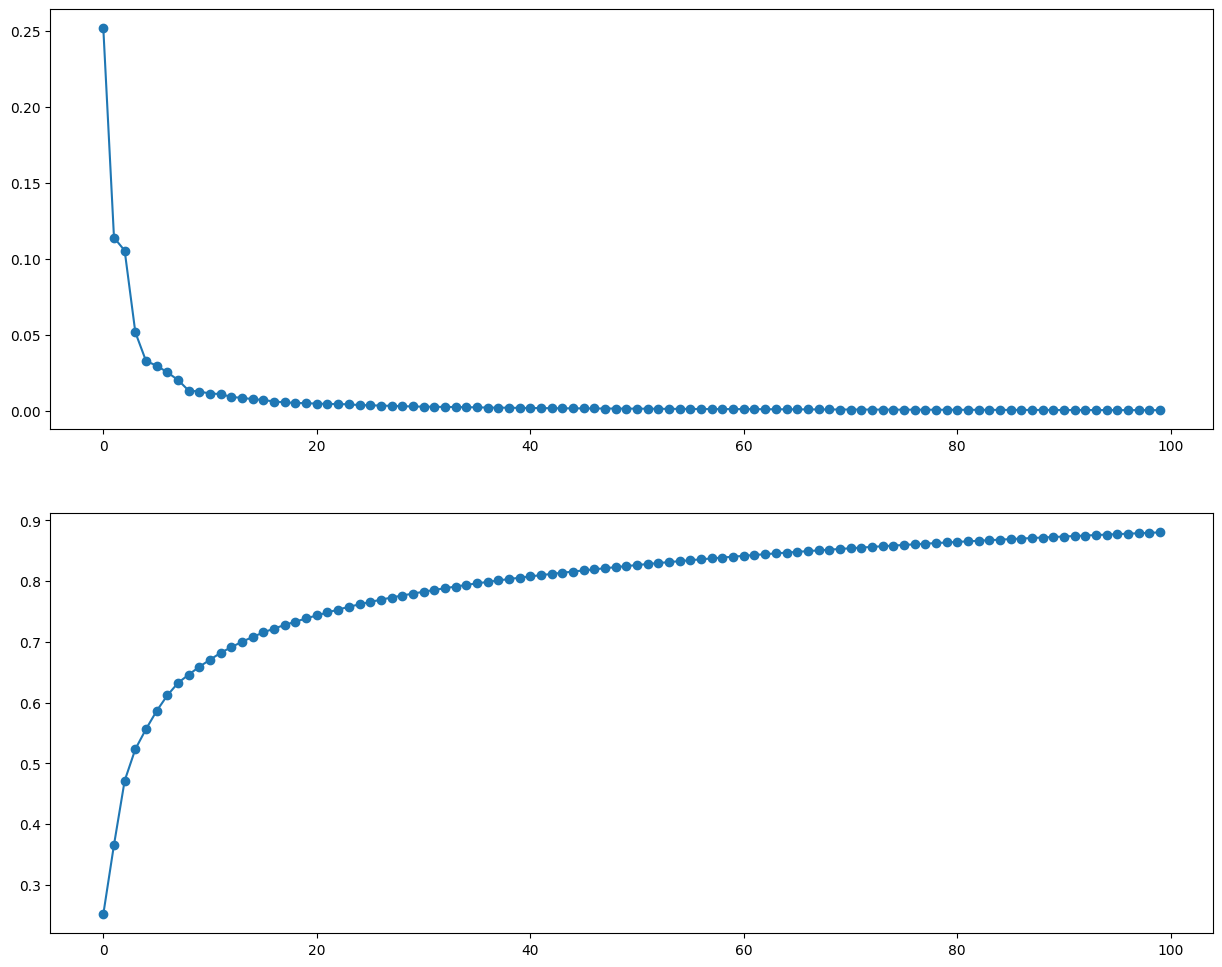

In [17]:
# visualize explained variance
fig, ax = plt.subplots(nrows=2,figsize=(15,12))
exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])

In [18]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(x_t)